<a href="https://colab.research.google.com/github/geporys/ts-project-assignment-hse-2023/blob/main/ExportForecastLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
nic = yf.Ticker("NIC.AX")

In [ ]:
hist = nic.history(period="max")

In [ ]:
hist = hist.asfreq(freq='B', method='ffill').fillna(method='ffill')

In [ ]:
import requests

r = requests.get('https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Commodity&tkData=300002,10,0,333&from=20170817&to=20230309')
nickelHist = pd.DataFrame(r.json())
nickelHist['Date'] = [pd.Timestamp(t, tz='Australia/Sydney') for t in nickelHist['Date']]
nickelHist.index = nickelHist['Date']
nickelHist = nickelHist[nickelHist.index >= hist.index[0]]
nickelHist = nickelHist.asfreq(freq='B', method='ffill').fillna(method='ffill')
hist = hist[hist.index <= nickelHist.index[-1]]
nickelHist

,Close,Open,High,Low,Volume,Estimate,Date
Date,,,,,,,
2018-08-20 00:00:00+10:00,13476.0,0,0,0,0,0,2018-08-20 00:00:00+10:00
2018-08-21 00:00:00+10:00,13474.5,0,0,0,0,0,2018-08-21 00:00:00+10:00
2018-08-22 00:00:00+10:00,13442.5,0,0,0,0,0,2018-08-22 00:00:00+10:00
2018-08-23 00:00:00+10:00,13197.5,0,0,0,0,0,2018-08-23 00:00:00+10:00
2018-08-24 00:00:00+10:00,13338.0,0,0,0,0,0,2018-08-24 00:00:00+10:00
...,...,...,...,...,...,...,...
2023-03-03 00:00:00+11:00,24400.0,0,0,0,0,0,2023-03-03 00:00:00+11:00
2023-03-06 00:00:00+11:00,24203.0,0,0,0,0,0,2023-03-06 00:00:00+11:00
2023-03-07 00:00:00+11:00,23957.5,0,0,0,0,0,2023-03-07 00:00:00+11:00


In [ ]:
rates = pd.DataFrame(data=[
{'date': hist.index[-1].strftime('%m/%d/%Y'),	'rate': 3.60},
{'date': "03/08/2023",	'rate': 3.60},
{'date': "02/08/2023",	'rate': 3.35},
{'date': "12/07/2022",	'rate': 3.10},
{'date': "11/02/2022",	'rate': 2.85},
{'date': "10/05/2022",	'rate': 2.60},
{'date': "09/07/2022",	'rate': 2.35},
{'date': "08/03/2022",	'rate': 1.85},
{'date': "07/06/2022",	'rate': 1.35},
{'date': "06/08/2022",	'rate': 0.85},
{'date': "05/04/2022",	'rate': 0.35},
{'date': "11/04/2020",	'rate': 0.10},
{'date': "03/20/2020",	'rate': 0.25},
{'date': "03/04/2020",	'rate': 0.50},
{'date': "10/02/2019",	'rate': 0.75},
{'date': "07/03/2019",	'rate': 1.00},
{'date': "06/05/2019",	'rate': 1.25},
{'date': "08/03/2016",	'rate': 1.50}
] )

rates['date'] = [pd.Timestamp(t, tz='Australia/Sydney') for t in rates['date']]
rates.index = rates['date']
rates = rates.drop(columns=['date'])
rates = rates.asfreq(freq='B').fillna(method='ffill')
rates = rates[rates.index >= hist.index[0]]
rates

,rate
date,
2018-08-20 00:00:00+10:00,1.50
2018-08-21 00:00:00+10:00,1.50
2018-08-22 00:00:00+10:00,1.50
2018-08-23 00:00:00+10:00,1.50
2018-08-24 00:00:00+10:00,1.50
...,...
2023-03-03 00:00:00+11:00,3.35
2023-03-06 00:00:00+11:00,3.35
2023-03-07 00:00:00+11:00,3.35


In [ ]:
# def check_existing_in_data(index, dates, data):
#     result = []
#     for i in index:
#         result = result + [bool(data[dates == i].shape[0])]
#     return result

# hist = hist[check_existing_in_data(hist.index, nickelHist['Date'], nickelHist)]
# nickelHist = nickelHist[check_existing_in_data(nickelHist['Date'], hist.index, hist)]
# nickelHist

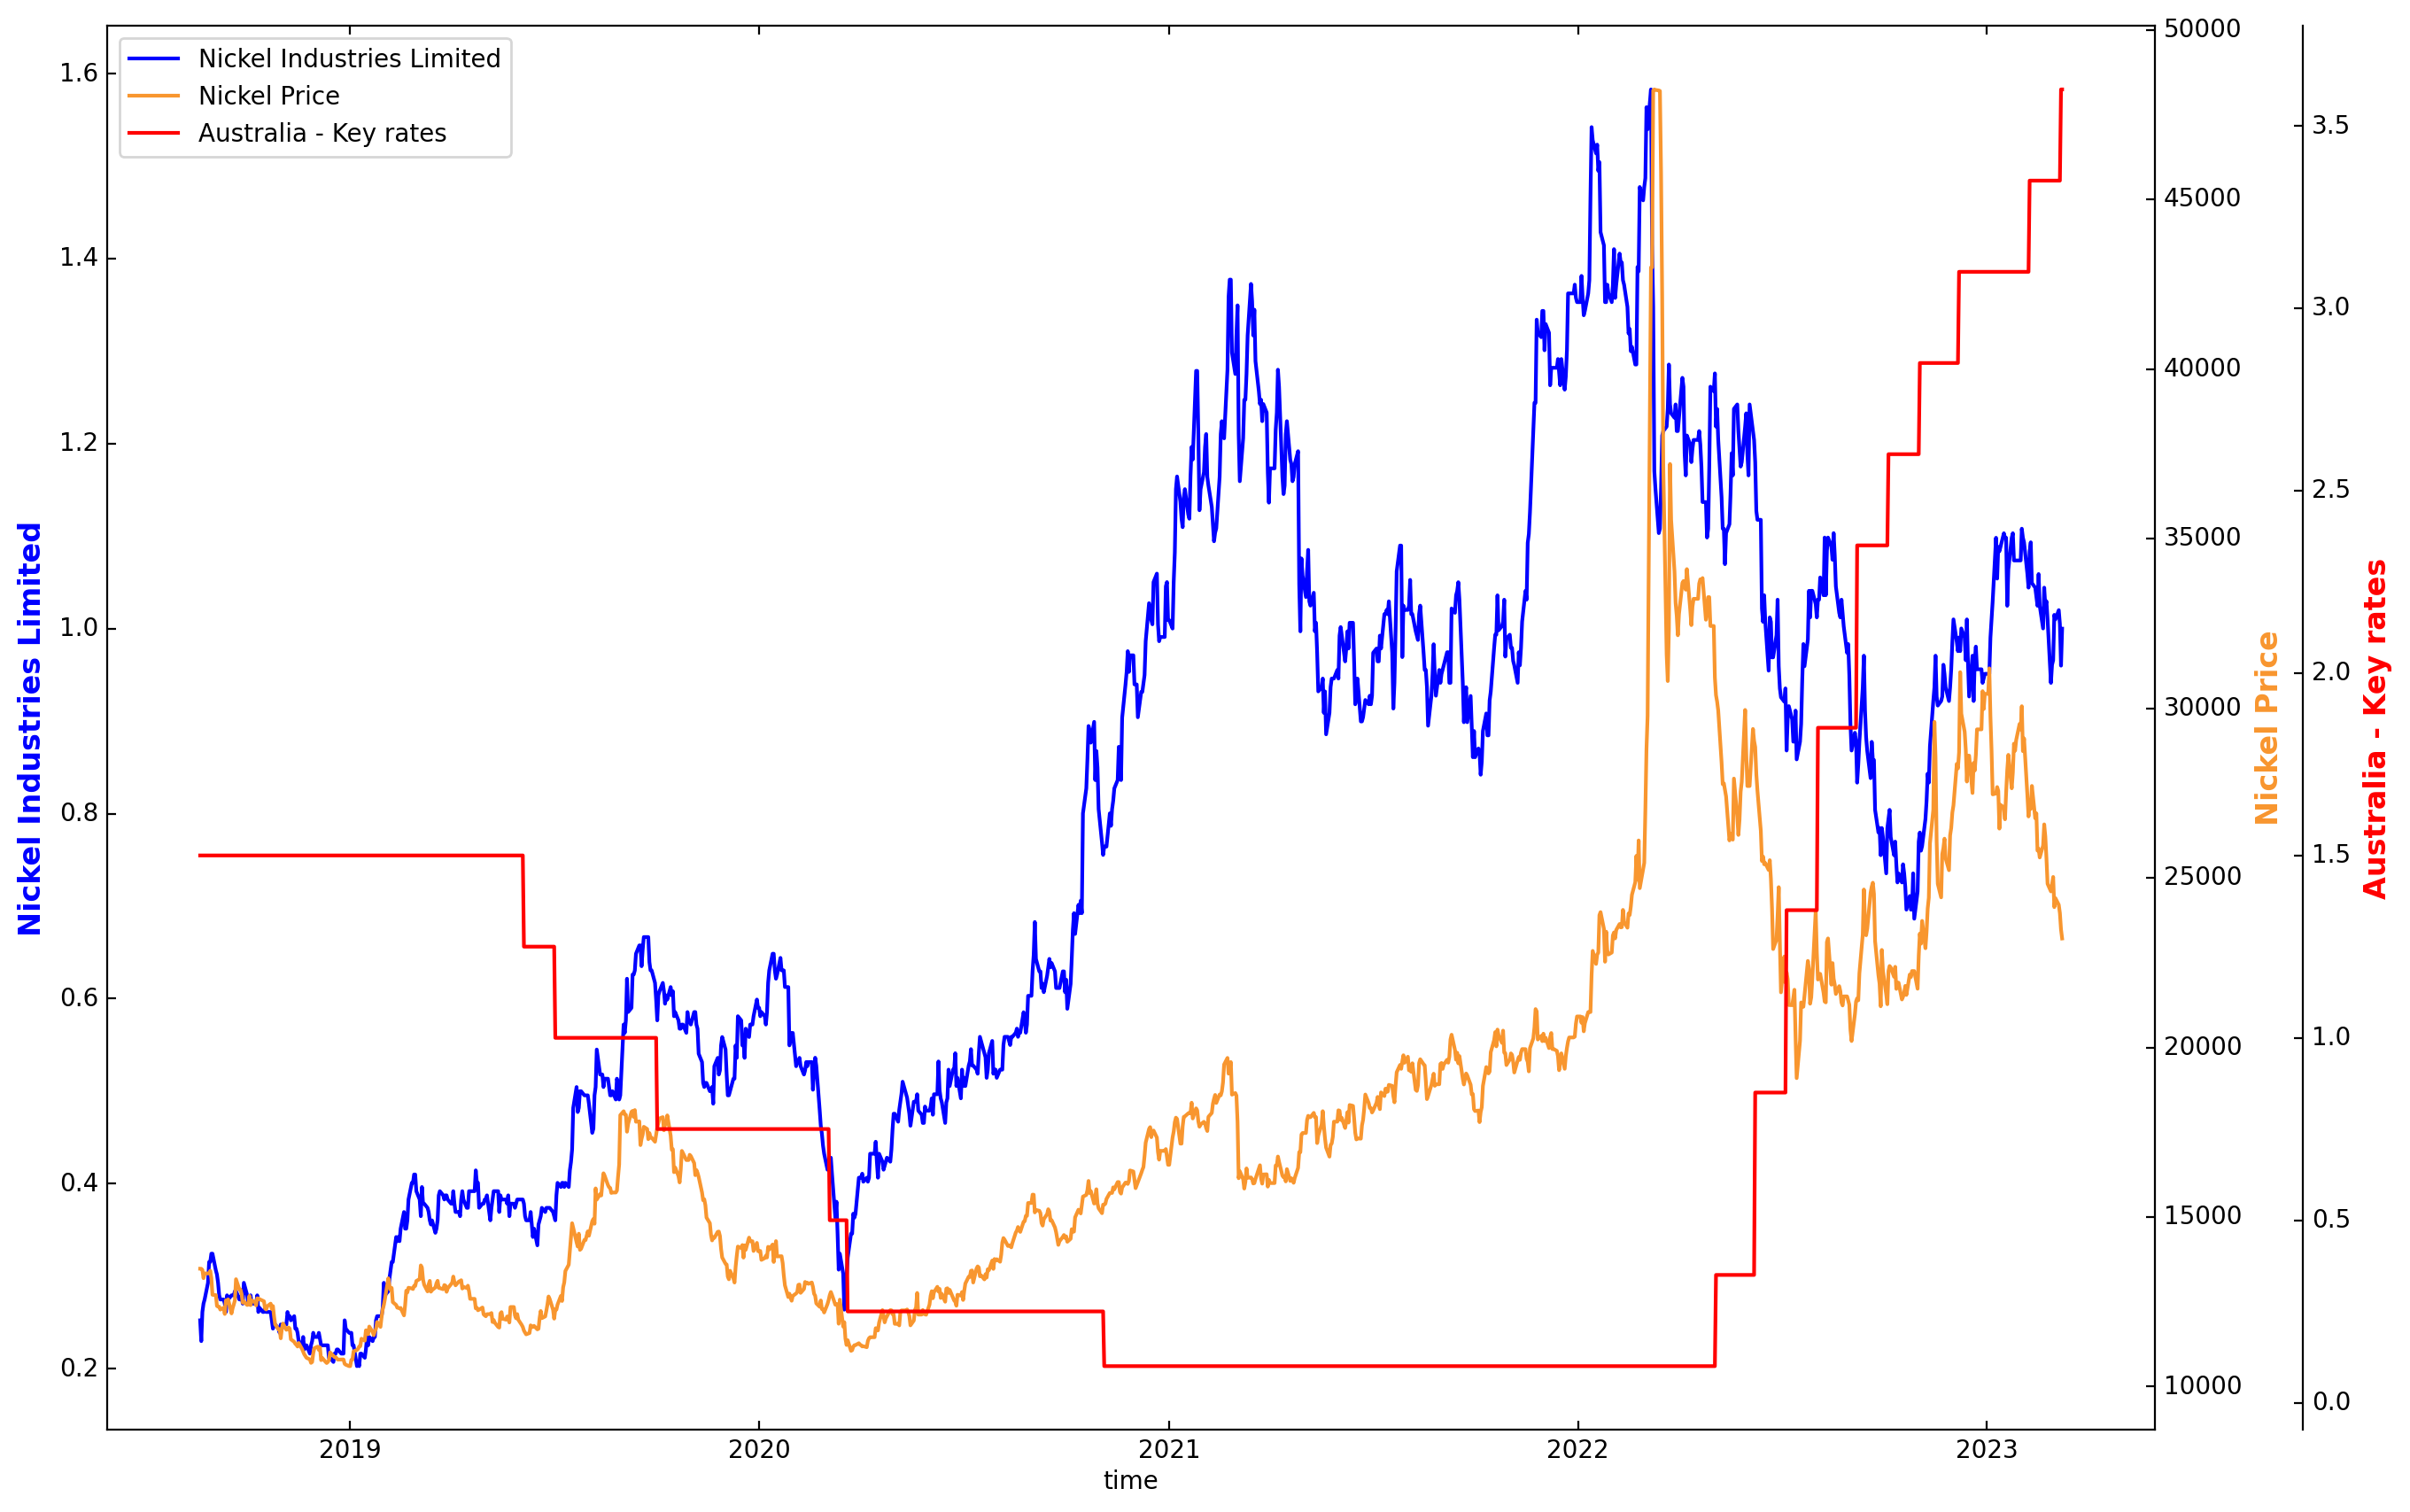

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

p1, = host.plot(hist.index, hist['Close'], label="Nickel Industries Limited", color="blue")
p2, = par1.plot(hist.index, nickelHist['Close'], label="Nickel Price", color="#f8962f")
p3, = par2.plot(hist.index, rates['rate'], label="Australia - Key rates", color="red")

# host.set_xlim(0, 2)
# host.set_ylim(0, 2)
# par1.set_ylim(0, 4)
# par2.set_ylim(1, 65)

host.set_xlabel("time")
host.set_ylabel("Nickel Industries Limited")
par1.set_ylabel("Nickel Price")
par2.set_ylabel("Australia - Key rates")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

host.axis["left"].label.set(fontsize=12, fontweight='bold', fontfamily="Georgia")
par1.axis["right"].label.set(fontsize=12, fontweight='bold', fontfamily="Georgia")
par2.axis["right"].label.set(fontsize=12, fontweight='bold', fontfamily="Georgia")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(200)

plt.show()

In [ ]:
data  = pd.DataFrame(data={'NIC': hist['Close'], 'Nickle price': nickelHist['Close'], 'Rate': rates['rate']}, index=hist.index)
data

,NIC,Nickle price,Rate
Date,,,
2018-08-20 00:00:00+10:00,0.252209,13476.0,1.25
2018-08-21 00:00:00+10:00,0.229690,13474.5,1.25
2018-08-22 00:00:00+10:00,0.261217,13442.5,1.25
2018-08-23 00:00:00+10:00,0.270224,13197.5,1.25
2018-08-24 00:00:00+10:00,0.274728,13338.0,1.25
...,...,...,...
2023-03-03 00:00:00+11:00,1.010000,24400.0,3.60
2023-03-06 00:00:00+11:00,1.020000,24203.0,3.60
2023-03-07 00:00:00+11:00,1.005000,23957.5,3.60


In [ ]:
train_data = data[data.index < '2022-11-21'] 
test_data = data[data.index >= '2022-11-21'] 

In [ ]:
endog = 'NIC'
exog = list(filter(lambda column: column != endog, data.columns))

In [ ]:
train_data.index

In [ ]:
mod = sm.tsa.arima.ARIMA(order=(4, 1, 1), endog=train_data[endog], exog=train_data[exog], freq="B")
res = mod.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    NIC   No. Observations:                 1110
Model:               SARIMAX(4, 0, 1)   Log Likelihood                2197.804
Date:                Fri, 10 Mar 2023   AIC                          -4379.608
Time:                        17:28:59   BIC                          -4339.511
Sample:                    08-20-2018   HQIC                         -4364.445
                         - 11-18-2022                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Nickle price  1.555e-05   8.58e-07     18.126      0.000    1.39e-05    1.72e-05
Rate            -0.1384      0.015     -8.972      0.000      -0.169      -0.108
ar.L1            0.8171      0.802      1.018      0.309      -0.756       2.390
ar.L2            0.3739      0.918      0.407      0.684      -1.425       2.173
ar.L3           -0.2137      0.049     -4.362      0.000      -0.310      -0.118
ar.L4           -0.0087      0.141     -0.062      0.951      -0.286       0.268
ma.L1            0.3319      0.800      0.415      0.678      -1.236       1.900
sigma2           0.0015   7.01e-05     21.596      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               663.12
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               6.15   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

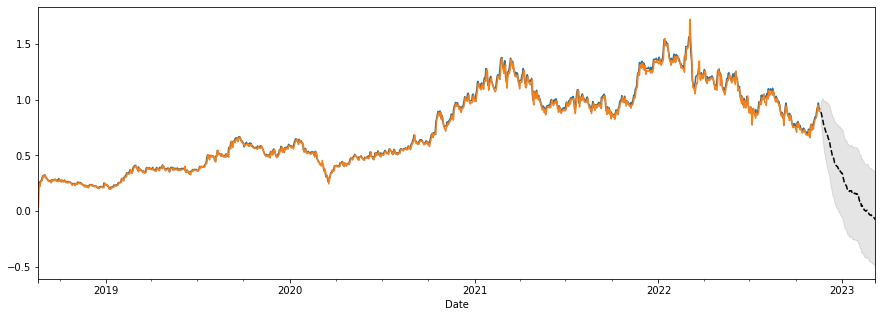

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

train_data[endog].plot(ax=ax)

res.fittedvalues.plot(ax=ax)

predicted_value = res.get_prediction(test_data.index[0], test_data.index[-1], exog=test_data[exog]).summary_frame()

predicted_value['mean'].plot(ax=ax, style='k--')
ax.fill_between(predicted_value.index, predicted_value['mean_ci_lower'], predicted_value['mean_ci_upper'], color='k', alpha=0.1);

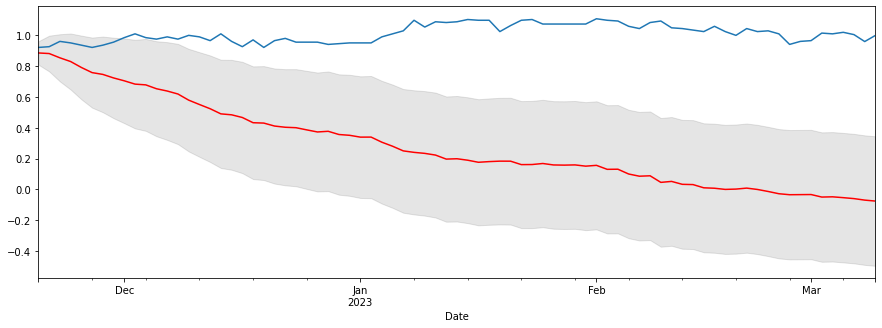

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
test_data[endog].plot(ax=ax)
predicted_value['mean'].plot(ax=ax, color='red')

ax.fill_between(predicted_value.index, predicted_value['mean_ci_lower'], predicted_value['mean_ci_upper'], color='k', alpha=0.1);

<AxesSubplot:xlabel='Date'>

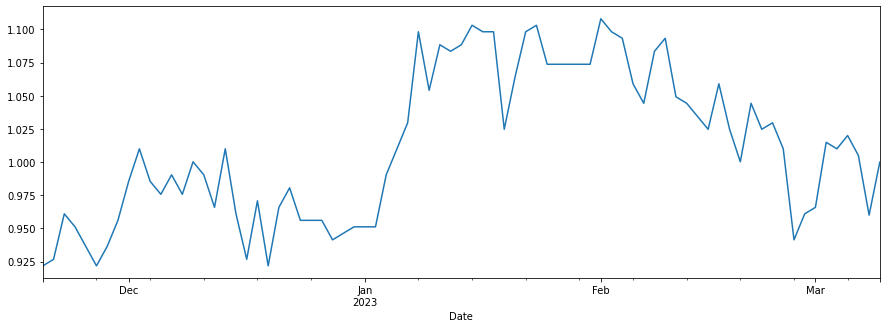

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

test_data[endog].plot(ax=ax)

In [ ]:
from statsmodels.tools.eval_measures import meanabs, mse, rmse

meanabs(test_data[endog], predicted_value['mean'])

In [ ]:
mse(test_data[endog], predicted_value['mean'])

In [ ]:
rmse(test_data[endog], predicted_value['mean'])

In [ ]:
[1,2,3,4]